In [ ]:
# Import the libraries we'll use below.
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

#plots
import seaborn as sns  # for nicer plots
sns.set(style="darkgrid")  # default style

#tensorflow and keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras import models
from keras import layers
from tensorflow.keras.layers import BatchNormalization
from keras import metrics
from keras import utils

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import VGG16

%matplotlib inline

#Import CIFAR-10 Classification
from keras.datasets import cifar10

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)

print("x_test shape: ", x_test.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (50000, 32, 32, 3)
y_train shape:  (50000, 1)
x_test shape:  (10000, 32, 32, 3)
y_test shape:  (10000, 1)


In [ ]:
# Pixel values range from 0 to 255. To normalize the data, just divide all values by 255.
x_train = x_train / 255
x_test = x_test / 255

# Flatten Y_train and Y_test, so they become vectors of label values.
# The label for X_train[0] is in Y_train[0].
y_train = y_train.flatten()
y_test = y_test.flatten()

label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Apply random shufflying to training examples.
np.random.seed(0)
indices = np.arange(x_train.shape[0])
shuffled_indices = np.random.permutation(indices)
x_train = x_train[shuffled_indices]
y_train = y_train[shuffled_indices]

In [ ]:
y_train.shape

(50000,)

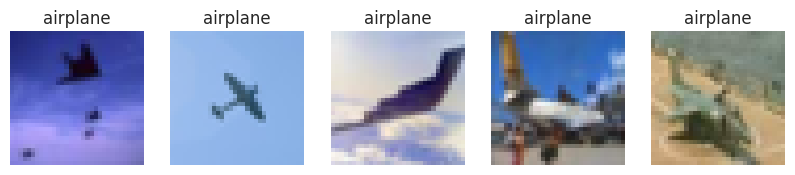

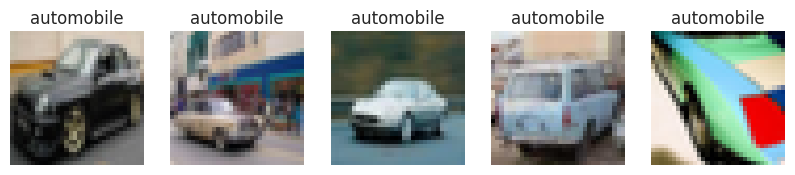

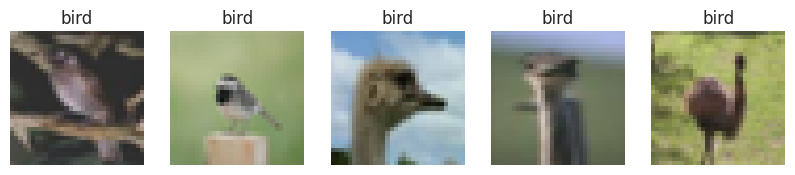

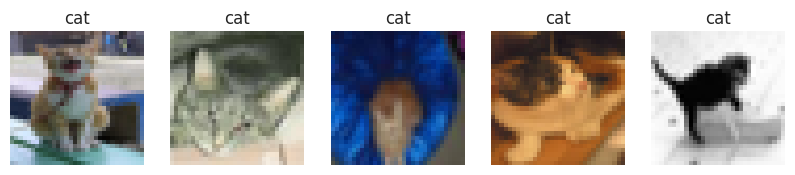

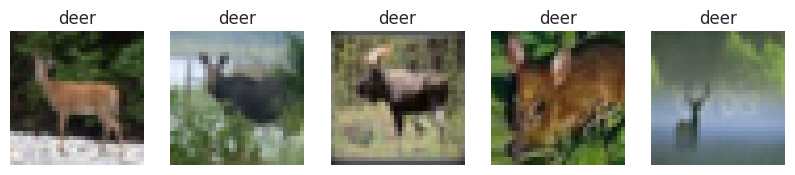

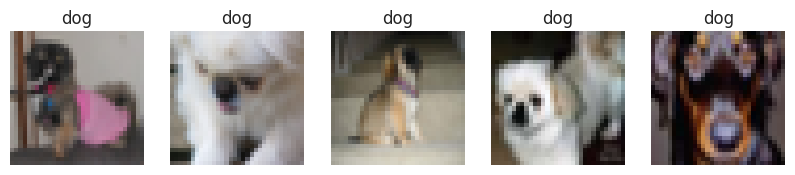

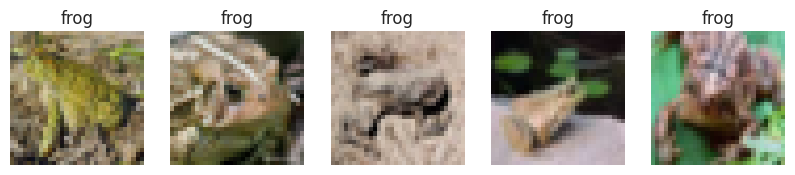

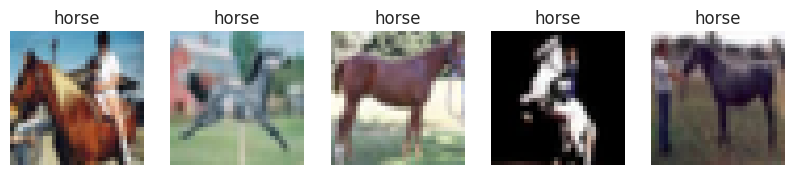

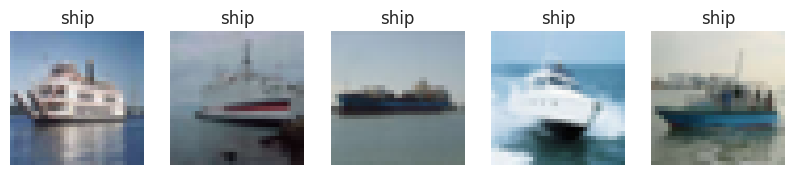

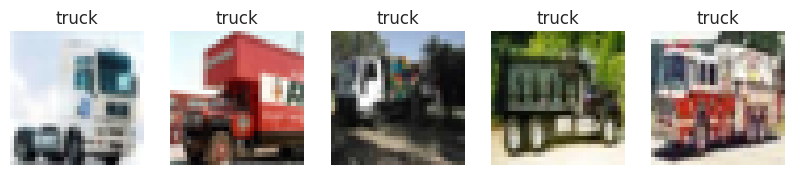

In [ ]:
for k in range(10):

  fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(10,5))
  
  # create a list to collect the index of elements in class i
  list = []
  
  for i in range(len(y_train)):
    
    if y_train[i]==k:
      list.append(i)
      
  for j in list[:5]:
    image = x_train[j]
    label = y_train[j]
    label_name = label_names[label]
    axs[list.index(j)].imshow(image)
    axs[list.index(j)].set_title(label_name)
    axs[list.index(j)].axis('off')
  
  plt.show()


In [ ]:
def build_model(n_classes, learning_rate):
  """Build a multi-class logistic regression model using Keras.

  Args:
    n_classes: Number of classes in the dataset
    learning_rate: The desired learning rate for SGD.

  Returns:
    model: A tf.keras model (graph).
  """
  tf.keras.backend.clear_session()
  np.random.seed(0)
  tf.random.set_seed(0)

  model = keras.Sequential()
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(

      units=10,
      activation='softmax',

  ))

  optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    
  model.compile(loss='sparse_categorical_crossentropy', 
                optimizer=optimizer, 
                metrics=['accuracy'])
  return model

In [ ]:
model = build_model(len(label_names), 0.01)

history = model.fit(
  x = x_train,
  y = y_train,
  epochs=10,
  batch_size=64,
  validation_split=0.1,
  verbose=0)

history1 = pd.DataFrame(history.history)
display(history1.iloc[-1:])

,loss,accuracy,val_loss,val_accuracy
9,1.740528,0.398644,1.911038,0.3398


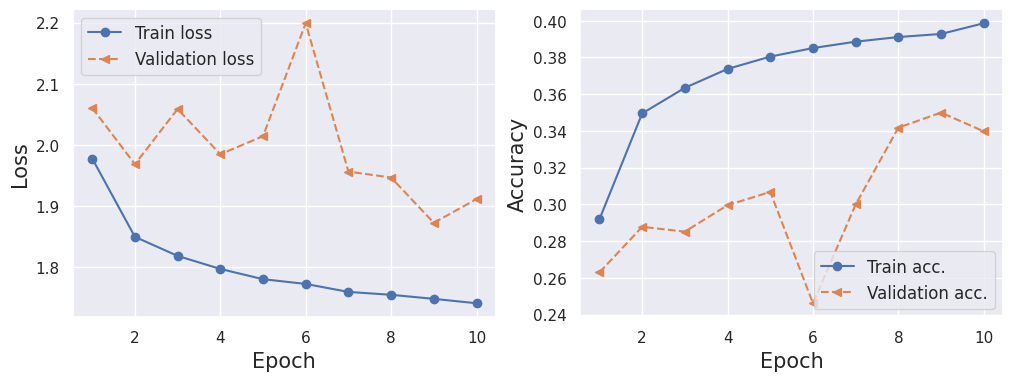

313/313 [==============================] - 1s 2ms/step - loss: 1.8917 - accuracy: 0.3506
Test accuracy: 0.350600004196167


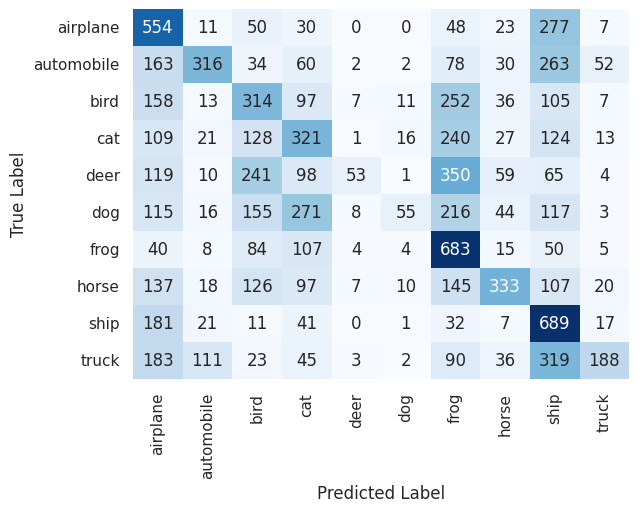

In [ ]:
# create a function to examine model results

def plot_results(history, x_test, y_test, label_names):
    
    # plot loss and accuracy
    hist = history.history
    x_arr = np.arange(len(hist['loss'])) + 1

    fig = plt.figure(figsize=(12, 4))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
    ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
    ax.legend(fontsize=12)
    ax.set_xlabel('Epoch', size=15)
    ax.set_ylabel('Loss', size=15)

    ax = fig.add_subplot(1, 2, 2)
    ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc.')
    ax.plot(x_arr, hist['val_accuracy'], '--<', label='Validation acc.')
    ax.legend(fontsize=12)
    ax.set_xlabel('Epoch', size=15)
    ax.set_ylabel('Accuracy', size=15)
    plt.show()

    # model.predict gives a vector of probabilities for each x.
    # Get labels by taking the argmax -- the index with the largest probability.
    test_predictions = np.argmax(model.predict(x_test), axis=-1)
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print("Test accuracy:", test_acc)

    # Create a confusion matrix as a 2D array.
    confusion_matrix = tf.math.confusion_matrix(y_test, test_predictions)

    # Use a heatmap plot to display it.
    ax = sns.heatmap(confusion_matrix, annot=True, fmt='.3g', cmap='Blues',
                    xticklabels=label_names, yticklabels=label_names, cbar=False)

    # Add axis labels.
    ax.set(xlabel='Predicted Label', ylabel='True Label')
    plt.show()
  
plot_results(history, x_test, y_test, label_names)

313/313 [==============================] - 0s 1ms/step


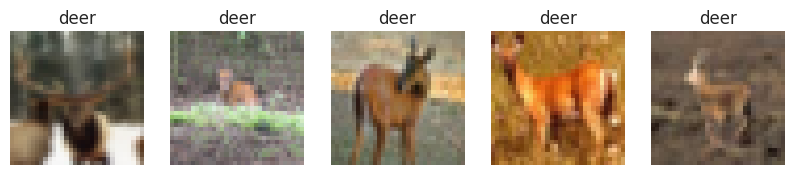

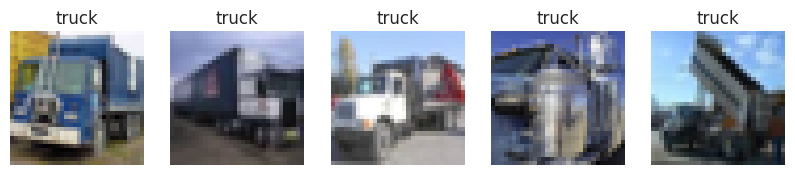

In [ ]:
# Display 5 images with true label "deer(4)", but predicted label "frog(6)"

true_deers = []

for i in range(len(y_test)):
  
  if y_test[i]==4:
    true_deers.append(i)

deer_frog = []

test_predictions = np.argmax(model.predict(x_test), axis=-1)

for j in true_deers:

  if test_predictions[j] == 6:
    deer_frog.append(j)

fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(10,5))

for k in deer_frog[:5]:
  image = x_test[k]
  label = y_test[k]
  label_name = label_names[label]
  axs[deer_frog.index(k)].imshow(image)
  axs[deer_frog.index(k)].set_title(label_name)
  axs[deer_frog.index(k)].axis('off')
plt.show()

# Display 5 images with predicted label "ship(8)", but true label "truck(9)"

true_trucks = []

for i in range(len(y_test)):
  
  if y_test[i]==9:
    true_trucks.append(i)

truck_ship = []

for j in true_trucks:

  if test_predictions[j] == 8:
    truck_ship.append(j)

fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(10,5))

for k in truck_ship[:5]:
  image = x_test[k]
  label = y_test[k]
  label_name = label_names[label]
  axs[truck_ship.index(k)].imshow(image)
  axs[truck_ship.index(k)].set_title(label_name)
  axs[truck_ship.index(k)].axis('off')
plt.show()


,loss,accuracy,val_loss,val_accuracy
29,1.720557,0.410111,1.886222,0.3542


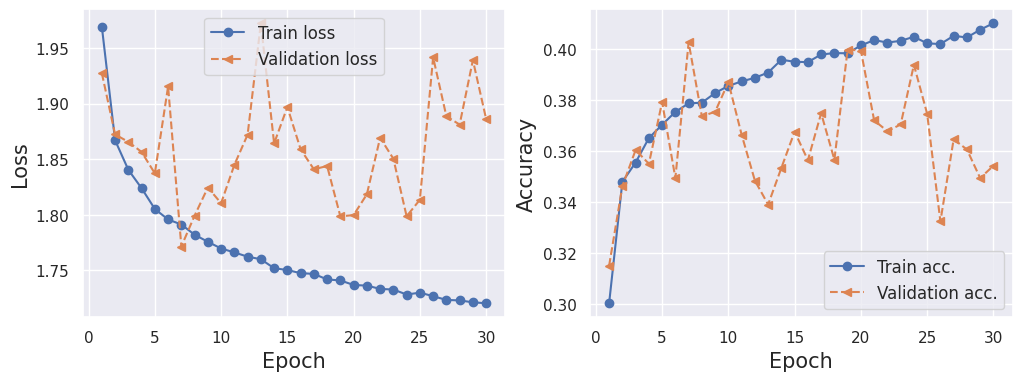

313/313 [==============================] - 1s 2ms/step - loss: 1.8450 - accuracy: 0.3574
Test accuracy: 0.35740000009536743


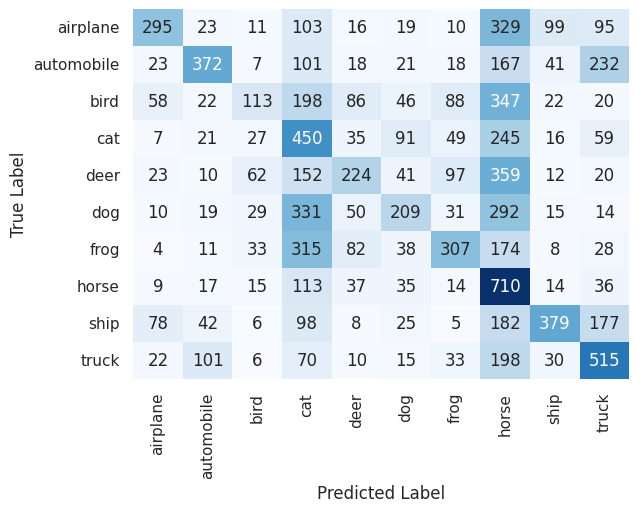

In [ ]:
# regression model with more epochs and a smaller batch size

model = build_model(len(label_names), 0.01)

history = model.fit(
  x = x_train,
  y = y_train,
  epochs=30,
  batch_size=20,
  validation_split=0.1,
  verbose=0)

history1 = pd.DataFrame(history.history)
display(history1.iloc[-1:])

plot_results(history, x_test, y_test, label_names)

,loss,accuracy,val_loss,val_accuracy
9,1.550355,0.445311,1.604054,0.4344


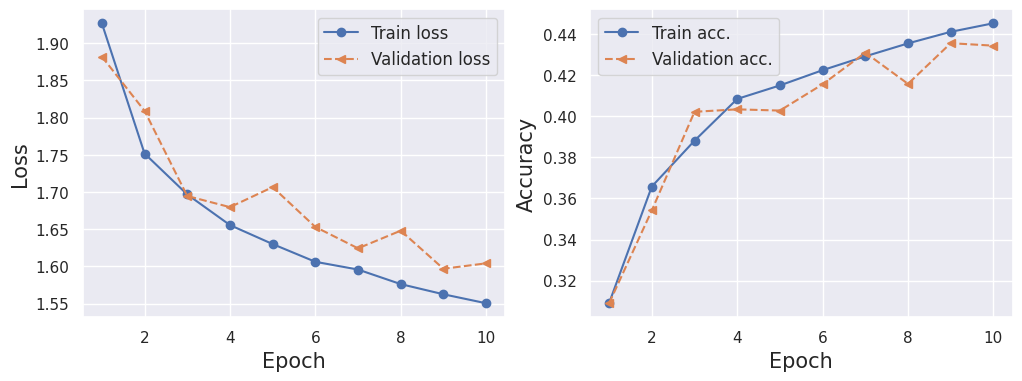

313/313 [==============================] - 1s 2ms/step - loss: 1.5785 - accuracy: 0.4347
Test accuracy: 0.43470001220703125


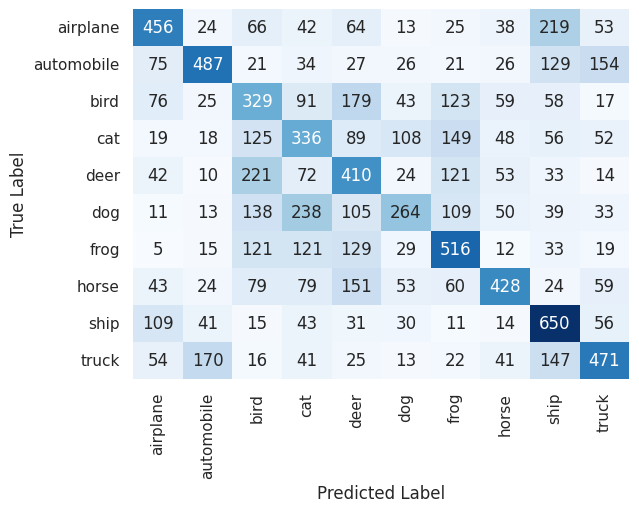

In [ ]:
# build a neural network with hidden layers

tf.keras.backend.clear_session()
np.random.seed(0)
tf.random.set_seed(0)

model = keras.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(256, activation='relu'),
    layers.Dense(128),
    layers.Dense(64),
    layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(
  x = x_train,
  y = y_train,
  epochs=10,
  batch_size=64,
  validation_split=0.1,
  verbose=0)

history1 = pd.DataFrame(history.history)
display(history1.iloc[-1:])

plot_results(history, x_test, y_test, label_names)

In [ ]:
# Build CNN Model

def build_cnn_model(n_classes,
                hidden_layer_sizes=[256, 128, 64],
                activation='relu',
                optimizer='Adam',
                learning_rate=0.01):
  """Build a multi-class logistic regression model using Keras.

  Args:
    n_classes: Number of output classes in the dataset.
    hidden_layer_sizes: A list with the number of units in each hidden layer.
    activation: The activation function to use for the hidden layers.
    optimizer: The optimizer to use (SGD, Adam).
    learning_rate: The desired learning rate for the optimizer.

  Returns:
    model: A tf.keras model (graph).
  """
  tf.keras.backend.clear_session()
  np.random.seed(0)
  tf.random.set_seed(0)

  model = keras.Sequential()
    
  model.add(keras.layers.Conv2D(filters = 32, kernel_size=(5,5), strides = (1,1), input_shape = (32,32,3), activation=activation))
  model.add(keras.layers.MaxPool2D(pool_size = (2,2)))
    
  model.add(keras.layers.Conv2D(filters = 64, kernel_size=(5,5), strides = (1,1), input_shape = (32,32,3), activation=activation))
  model.add(keras.layers.MaxPool2D(pool_size = (2,2)))
  
  model.add(keras.layers.Flatten())
  for hidden_layer_size in hidden_layer_sizes:
        model.add(keras.layers.Dense(units=hidden_layer_size,
                                    activation = activation)) #use this for hidden layers
  
  model.add(tf.keras.layers.Dropout(rate=0.5)) # add dropout layer

  model.add(keras.layers.Dense(
      units=n_classes,
      activation="softmax")) #use "softmax" for active layers
  
  model.compile(loss = 'sparse_categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
  return model

,loss,accuracy,val_loss,val_accuracy
9,0.500349,0.822089,0.887028,0.7198


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 1024)              1

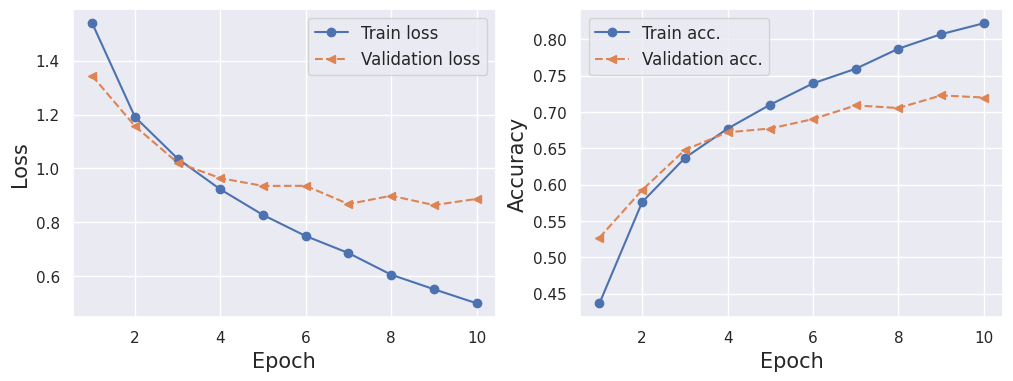

313/313 [==============================] - 1s 2ms/step - loss: 0.9144 - accuracy: 0.7147
Test accuracy: 0.7146999835968018


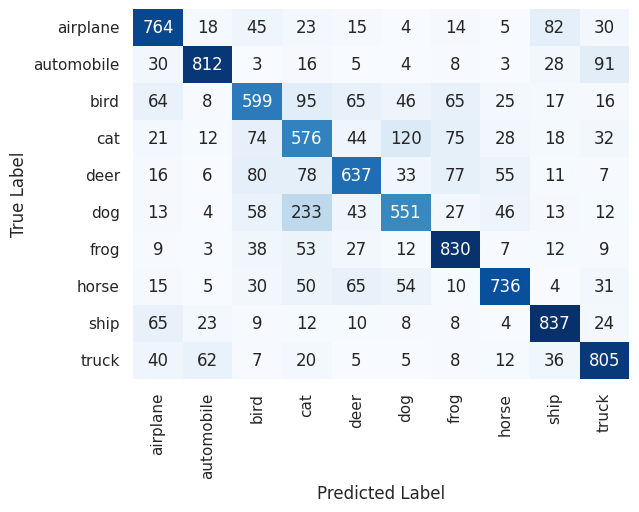

In [ ]:
model = build_cnn_model(len(label_names), learning_rate=0.01, hidden_layer_sizes=[1024])

history = model.fit(
  x = x_train,
  y = y_train,
  epochs=10,
  batch_size=64,
  validation_split=0.1,
  verbose=0)

history1 = pd.DataFrame(history.history)
display(history1.iloc[-1:])
print(model.summary())

# Evaluate model on test data
# test_loss, test_acc = model.evaluate(x_test, y_test)
# print("Test accuracy:", test_acc)

plot_results(history, x_test, y_test, label_names)

In [ ]:
# to build CNN model 2

def build_cnn_model_2(n_classes,
                hidden_layer_sizes=[256, 128, 64],
                activation='relu',
                optimizer='Adam',
                learning_rate=0.01):
  """Build a multi-class logistic regression model using Keras.

  Args:
    n_classes: Number of output classes in the dataset.
    hidden_layer_sizes: A list with the number of units in each hidden layer.
    activation: The activation function to use for the hidden layers.
    optimizer: The optimizer to use (SGD, Adam).
    learning_rate: The desired learning rate for the optimizer.

  Returns:
    model: A tf.keras model (graph).
  """
  tf.keras.backend.clear_session()
  np.random.seed(0)
  tf.random.set_seed(0)

  model = keras.Sequential()
    
  model.add(keras.layers.Conv2D(filters = 64, kernel_size=(5,5), strides = (1,1), input_shape = (32,32,3), activation=activation, padding='same'))
  model.add(BatchNormalization())
  model.add(keras.layers.MaxPool2D(pool_size = (2,2)))
    
  model.add(keras.layers.Conv2D(filters = 64, kernel_size=(5,5), strides = (1,1), input_shape = (32,32,3), activation=activation, padding='same'))
  model.add(BatchNormalization())
  model.add(keras.layers.MaxPool2D(pool_size = (2,2)))
  
  model.add(keras.layers.Flatten())
  for hidden_layer_size in hidden_layer_sizes:
        model.add(keras.layers.Dense(units=hidden_layer_size,
                                    activation = activation)) #use this for hidden layers
  
  model.add(tf.keras.layers.Dropout(rate=0.5)) # add dropout layer

  model.add(keras.layers.Dense(
      units=n_classes,
      activation="softmax")) #use "softmax" for active layers
  
  model.compile(loss = 'sparse_categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
  return model


,loss,accuracy,val_loss,val_accuracy
9,0.374786,0.870778,0.872561,0.719


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        4864      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        102464    
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 64)       256       
 hNormalization)                                                 
                                                        

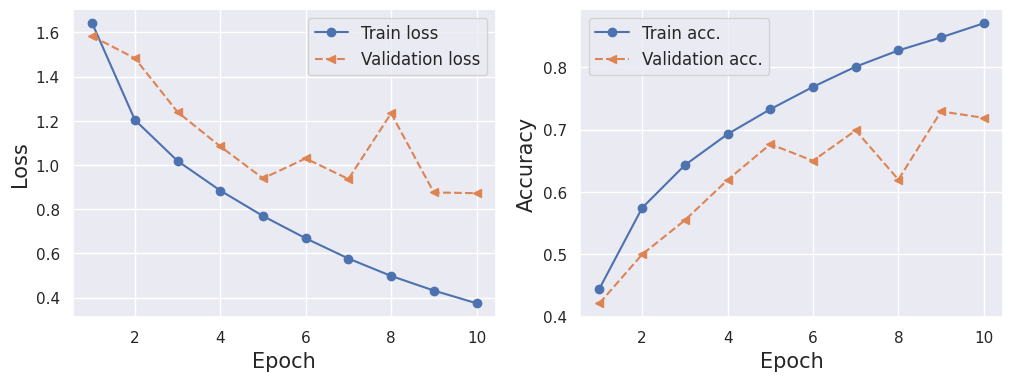

313/313 [==============================] - 1s 3ms/step - loss: 0.8743 - accuracy: 0.7219
Test accuracy: 0.7218999862670898


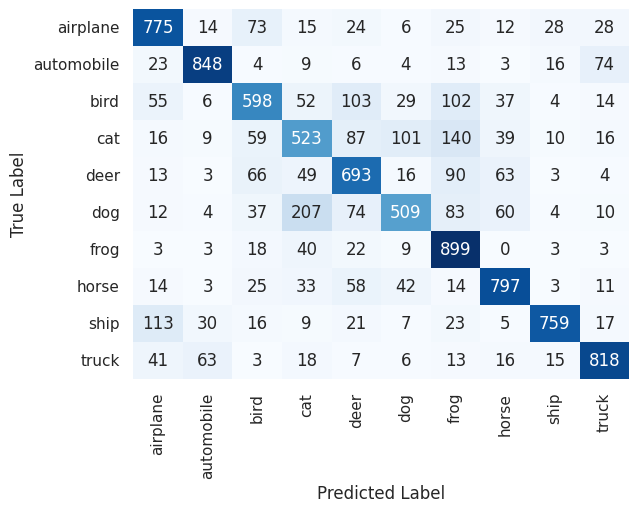

In [ ]:
model = build_cnn_model_2(len(label_names), learning_rate=0.01, hidden_layer_sizes=[1024])

history = model.fit(
  x = x_train,
  y = y_train,
  epochs=10,
  batch_size=64,
  validation_split=0.1,
  verbose=0)

history1 = pd.DataFrame(history.history)
display(history1.iloc[-1:])
print(model.summary())

plot_results(history, x_test, y_test, label_names)